In [2]:
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sfp_nsdsyn import *
import warnings
import itertools

warnings.filterwarnings("ignore", category=UserWarning)
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2

In [3]:
output_dir='/Volumes/server/Projects/sfp_nsd/derivatives'

ARGS_2D = ['sub','lr','eph','roi']
broderick_sn_list = [1, 6, 7, 45, 46, 62, 64, 81, 95, 114, 115, 121]
broderick_subj_list = [utils.sub_number_to_string(sn, dataset="broderick") for sn in broderick_sn_list]

nsdsyn_subj_list = [utils.sub_number_to_string(sn, dataset='nsdsyn') for sn in range(1, 9)]
lr=0.0005
eph=30000
dset='nsdsyn'

# Load model 
## Load final model parameters

In [5]:
pt_file_list = []
for subj, roi in itertools.product(nsdsyn_subj_list, ['V1']):
    file_name = f'model-params_lr-{lr}_eph-{eph}_sub-{subj}_roi-{roi}_vs-pRFsize.pt'
    pt_file_list.append(os.path.join(output_dir, 'sfp_model', 'test_results_2D', dset, file_name))
model_df = model.load_all_models(pt_file_list, *ARGS_2D)

## Load model parameter and loss histories


In [7]:
l, m = [], []
for subj, roi in itertools.product(nsdsyn_subj_list, ['V1']):
    loss_file_name = f'loss-history_lr-{lr}_eph-{eph}_sub-{subj}_roi-{roi}_vs-pRFsize.h5'
    l.append(os.path.join(output_dir,  'sfp_model', 'test_results_2D', dset, loss_file_name))
    param_file_name = f'model-history_lr-{lr}_eph-{eph}_sub-{subj}_roi-{roi}_vs-pRFsize.h5'
    m.append(os.path.join(output_dir,  'sfp_model', 'test_results_2D', dset, param_file_name))

loss_df = pd.DataFrame({})    
for l_file in l:
    tmp_df = utils.load_dataframes([l_file], *ARGS_2D)
    tmp_df = tmp_df[tmp_df.epoch % 2 == 0]
    loss_df = pd.concat((loss_df, tmp_df), axis=0)
    
param_df = pd.DataFrame({})    
for m_file in m:
    tmp_df = utils.load_dataframes([m_file], *ARGS_2D)
    tmp_df = tmp_df[tmp_df.epoch % 2 == 0]
    param_df = pd.concat((param_df, tmp_df), axis=0)

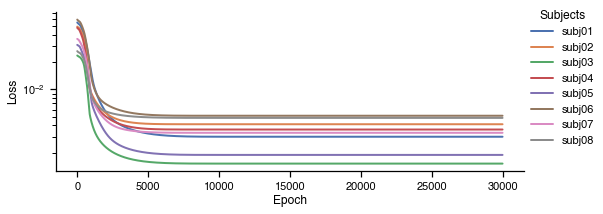

In [8]:
vis.plot_loss_history(loss_df, hue='sub', lgd_title='Subjects', 
                      hue_order=nsdsyn_subj_list, palette=None)

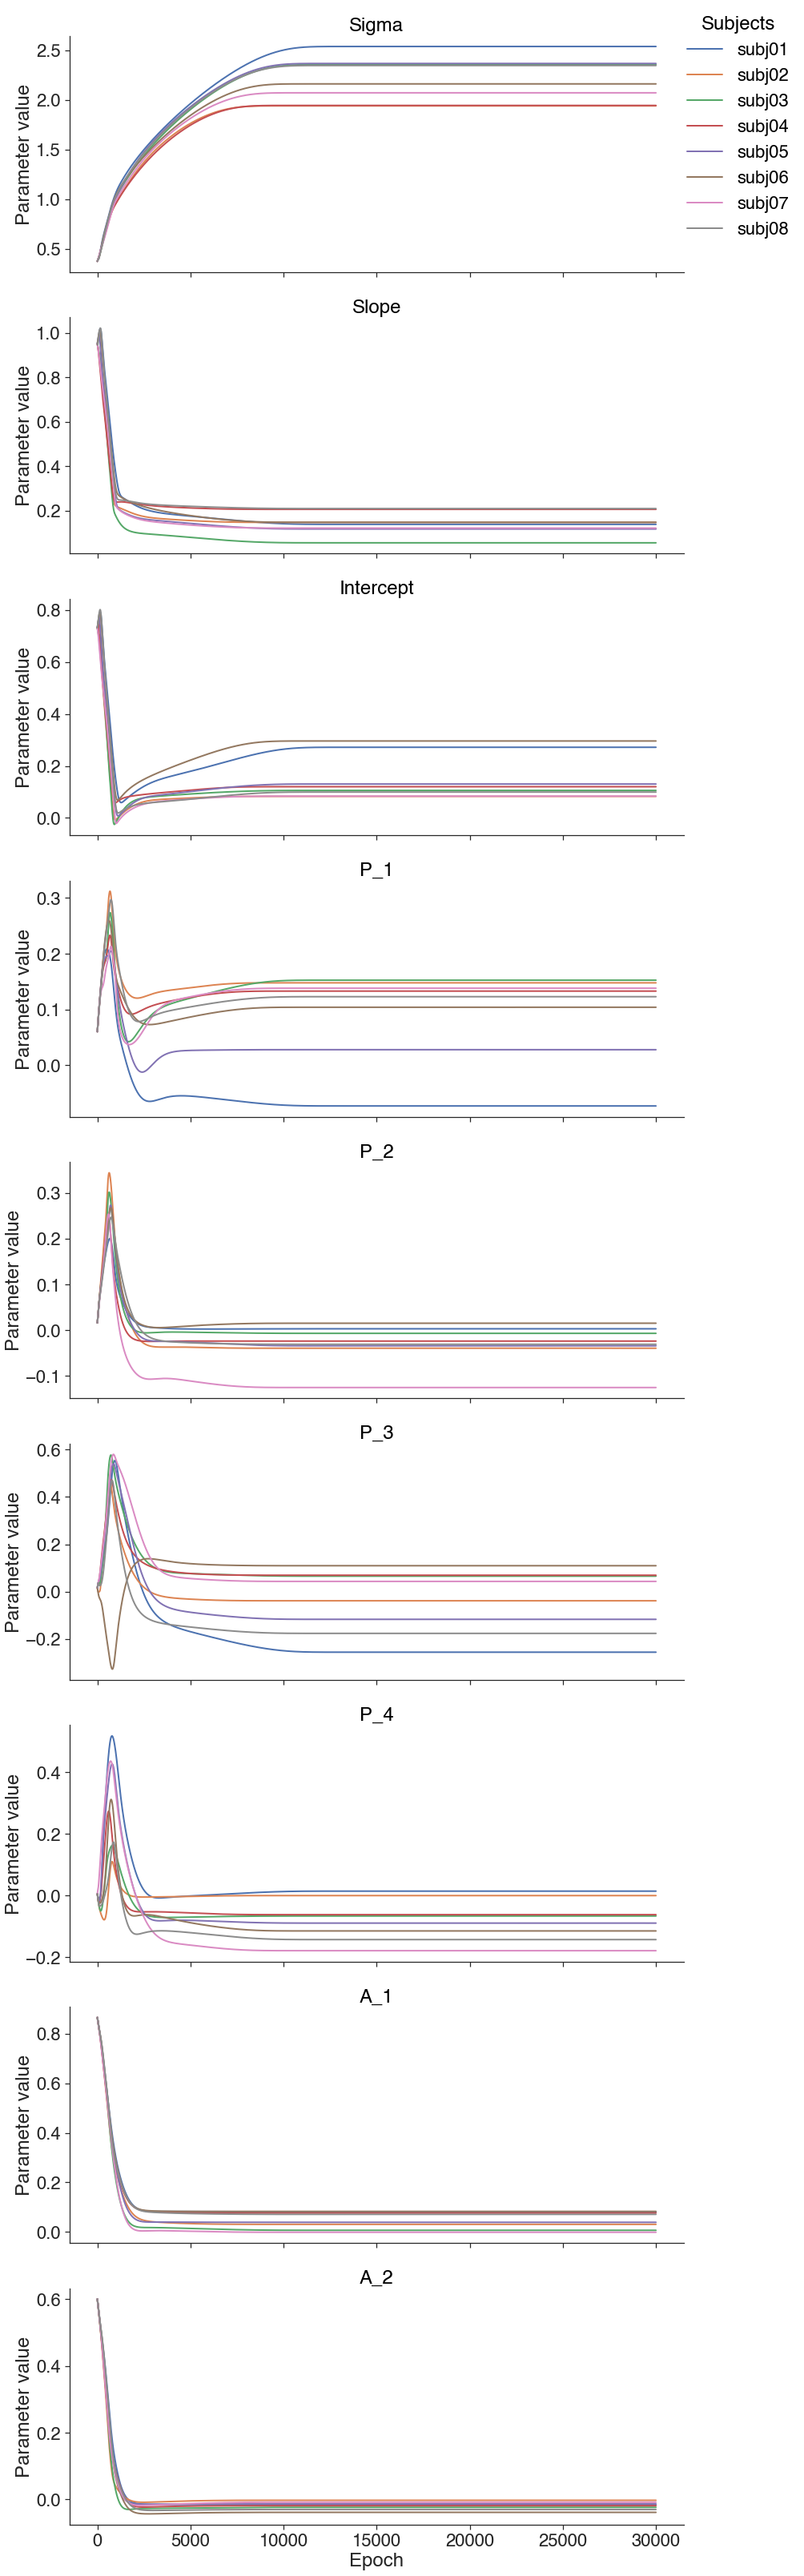

In [9]:
vis.plot_param_history(param_df, params=['sigma', 'slope', 'intercept', 'p_1', 'p_2', 'p_3', 'p_4', 'A_1', 'A_2'],
hue='sub', lgd_title='Subjects', hue_order=nsdsyn_subj_list, palette=None)